In [344]:
import numpy as np
import matplotlib.pyplot as plt
from  PIL import Image
import os
import pandas as pd
target_size = (24, 24)
dogs = np.array([np.array(Image.open('Animals/dog/'+x).resize(target_size).convert('L')) for x in os.listdir('Animals/dog/') if os.path.isfile(os.path.join('Animals/dog/', x))])
cats = np.array([np.array(Image.open('Animals/cat/'+x).resize(target_size).convert('L'))  for x in os.listdir('Animals/cat/') if os.path.isfile(os.path.join('Animals/cat/', x))])


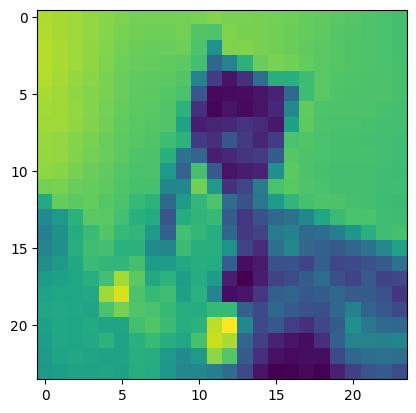

In [345]:
plt.imshow(cats[800])

In [346]:
from sklearn.model_selection import train_test_split
x=np.concatenate([dogs,cats])
y=np.concatenate([[0 for i in range(dogs.shape[0])],[1 for i in range(cats.shape[0])]])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)



dog:0
cat:1



0

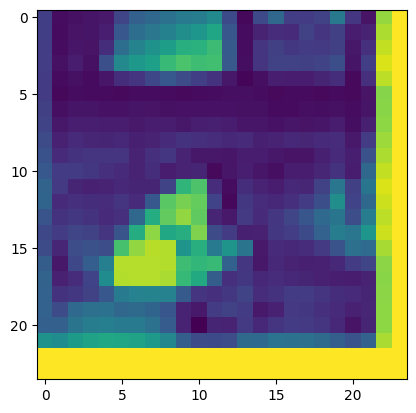

In [347]:
plt.imshow(x_train[0])
y_train[0]

In [348]:
import tensorflow as tf


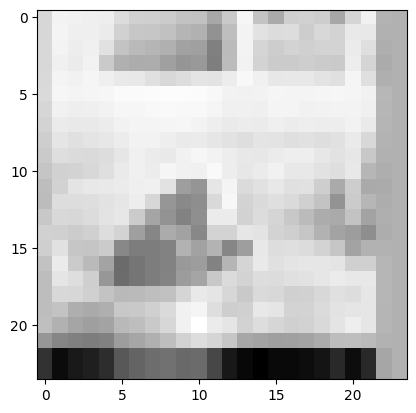

In [349]:
x_train=tf.keras.utils.normalize(x_train ,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

In [393]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(24, 24)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')  # Ensure 'softmax' is a string
])

c:\Users\nouredinekn\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [394]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [395]:

model.fit(x_train, y_train, epochs=10)


Epoch 1/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.4988 - loss: 0.8377
Epoch 2/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5614 - loss: 0.6862
Epoch 3/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5658 - loss: 0.6839
Epoch 4/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5920 - loss: 0.6669
Epoch 5/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5806 - loss: 0.6723
Epoch 6/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6025 - loss: 0.6581
Epoch 7/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6129 - loss: 0.6565
Epoch 8/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6049 - loss: 0.6619
Epoch 9/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6078 - loss: 0.6546
Epoch 10/10
256/256 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6227 - loss: 0.6524


In [396]:
val_loss,val_accuracy=model.evaluate(x_test,y_test)

64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5488 - loss: 171.7645


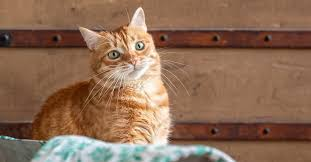

In [397]:
x=Image.open('Animals/test.jpg')
x

In [398]:
test=np.array(x.resize((24,24)).convert('L'))
prediction = np.argmax(model.predict(np.array([test])))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


1

In [399]:
model.save("dog_cat.h5")

In [ ]:
loaded_model = tf.keras.models.load_model("dog_cat.h5")


In [403]:
prediction = np.argmax(loaded_model .predict(np.array([test])))
prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


1

#by Nouredine_kn